In [7]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../data/final/final_dataset.csv")

In [9]:
x = df.drop("price", axis=1)
y = df["price"]

In [10]:
model = joblib.load('../model/HistGradientBoostingRegressor.joblib')

In [11]:
y_pred = model.predict(x)

In [ ]:
errors = y - y_pred # rostanlik qiymat bilan predict qiymat ni farqi

In [21]:
errors

0       -0.010826
1        0.082314
2       -0.451297
3        0.301427
4       -0.003928
           ...   
21608   -0.147373
21609   -0.157142
21610    0.240071
21611   -0.040882
21612    0.047923
Name: price, Length: 21613, dtype: float64

In [13]:
df_errors = pd.DataFrame({
    "Actual": y,
    "Predicted": y_pred,
    "Error": errors,
    "AbsoluteError": errors.abs(),
    "SquaredError": errors**2
})

In [ ]:
print("Mean Error:", errors.mean())
print("Mean Absolute Error:", errors.abs().mean())
print("Mean Squared Error:", (errors**2).mean())
print("Max Error:", errors.max())
print("Min Error:", errors.min())

Mean Error: 0.0008308543264656064
Mean Absolute Error: 0.10491909792091757
Mean Squared Error: 0.020965173721577697
Max Error: 0.863152939712144
Min Error: -1.1726166266039737


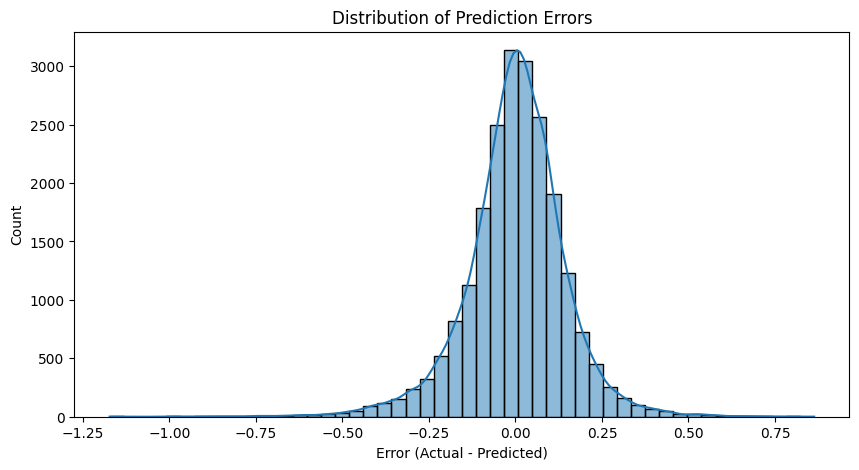

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(errors, bins=50, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Count")
plt.show()

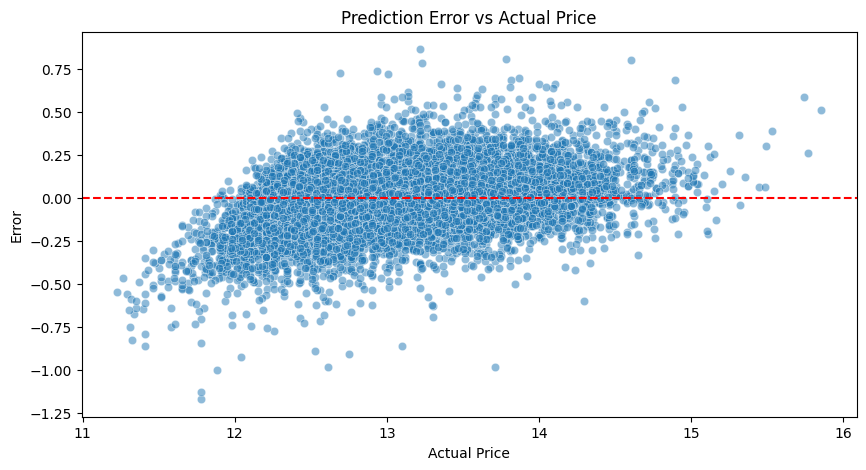

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y, y=errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Prediction Error vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Error")
plt.show()

In [27]:
top_errors = df_errors.sort_values("AbsoluteError", ascending=False).head(20)
print(top_errors)

          Actual  Predicted     Error  AbsoluteError  SquaredError
1222   11.775297  12.947914 -1.172617       1.172617      1.375030
18332  11.775297  12.907670 -1.132373       1.132373      1.282268
12823  11.884496  12.887666 -1.003170       1.003170      1.006351
14835  12.613283  13.597718 -0.984436       0.984436      0.969113
21050  13.710151  14.693810 -0.983659       0.983659      0.967585
1626   12.039534  12.965695 -0.926161       0.926161      0.857774
19188  12.753040  13.665502 -0.912462       0.912462      0.832587
326    12.524439  13.413869 -0.889430       0.889430      0.791086
7992   11.407576  12.271924 -0.864348       0.864348      0.747097
8057   13.217675  12.354522  0.863153       0.863153      0.745033
21372  13.102163  13.962855 -0.860693       0.860693      0.740792
12724  11.775297  12.618891 -0.843593       0.843593      0.711649
18468  11.326608  12.156904 -0.830296       0.830296      0.689392
7319   13.785052  12.979450  0.805602       0.805602      0.64